In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

from xgboost import XGBClassifier

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv("train.csv")
print(data.shape)
data.head()

(116058, 29)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [3]:
data['first_payment_date'] = pd.DatetimeIndex(data['first_payment_date']).month
data['origination_date'] =  pd.DatetimeIndex(data['origination_date']).month
print(data.shape)
data.head()

(116058, 29)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,3,5,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,1,3,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,1,3,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2,4,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2,4,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [4]:
def plot_label(num,col,ax):
    dt = data[col].value_counts()
    dt = dt.reset_index()
    #print(dt)
    df = pd.DataFrame(dt)
    #print(type(df))
    df.columns = ['a','b']
    
    
    #plt.subplot(20,2,num)
    ax.plot(df['a'],df['b'],'ro')
    ax.set_title(col)
    plt.show()
    
def plot_one_label(col):
    dt = data[col].value_counts()
    dt = dt.reset_index()
    #print(dt)
    df = pd.DataFrame(dt)
    #print(type(df))
    df.columns = ['a','b']
    
    
    #plt.subplot(20,2,num)
    plt.plot(df['a'],df['b'],'ro')
    plt.title(col)
    plt.show()

def plot_ones(col):
    
    #data1 = data.loc[data['m13'] == 0]
    
    #data2 = data.loc[data['m13'] == 1]
    
    dt_0 = data.loc[data['m13'] == 0].groupby(col).count()[['m13']]
    dt_0 = dt_0.reset_index()
    
    plt.plot(dt_0[col],dt_0['m13'],'ro')
    plt.show()
    print(dt_0.sort_values('m13',ascending=False))
    dt_1 = data.loc[data['m13'] == 1].groupby(col).count()[['m13']]
    dt_1 = dt_1.reset_index()
    plt.plot(dt_1[col],dt_1['m13'],'ro')
    plt.show()
    print(dt_1.sort_values('m13',ascending=False))

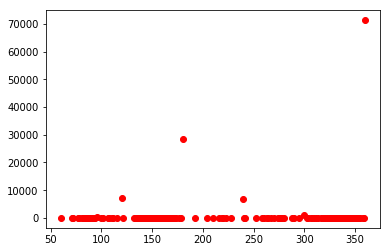

     loan_term    m13
139        360  71324
67         180  28499
25         120   7042
76         240   6716
95         300    907
..         ...    ...
81         260      1
80         258      1
78         242      1
12          88      1
82         263      1

[140 rows x 2 columns]


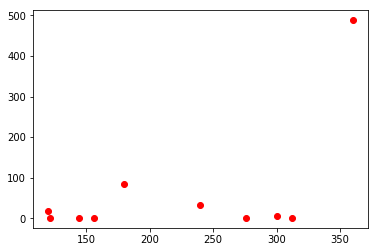

   loan_term  m13
9        360  488
4        180   85
5        240   33
0        120   19
7        300    5
6        276    2
1        121    1
2        144    1
3        156    1
8        312    1


In [5]:
plot_ones('loan_term')

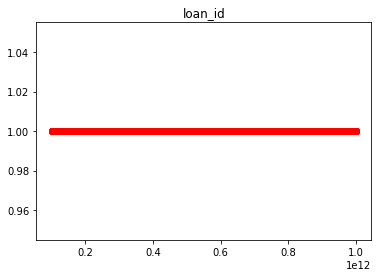

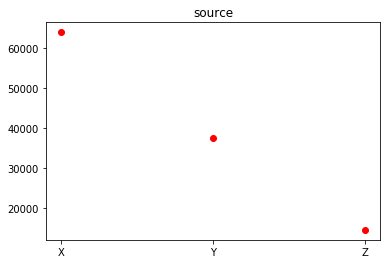

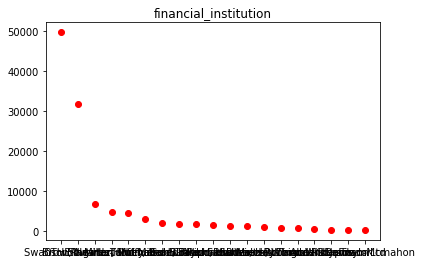

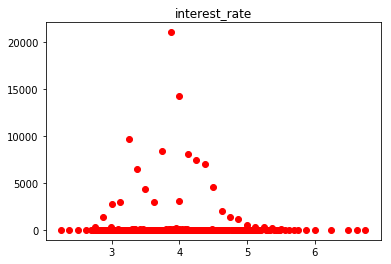

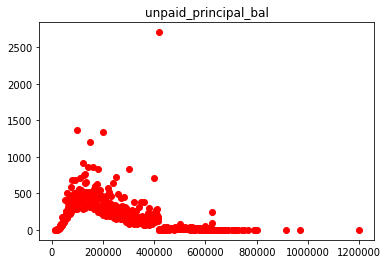

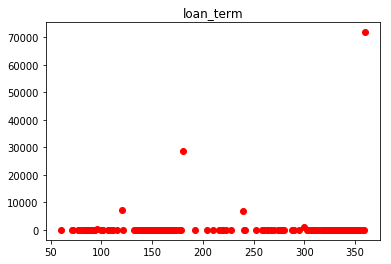

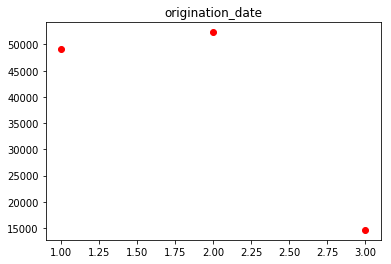

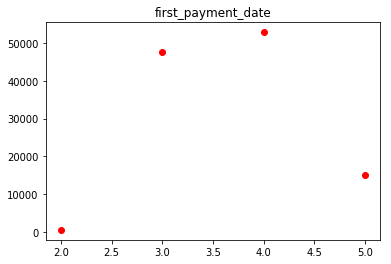

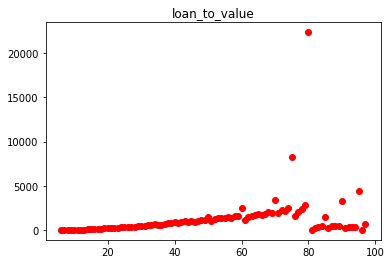

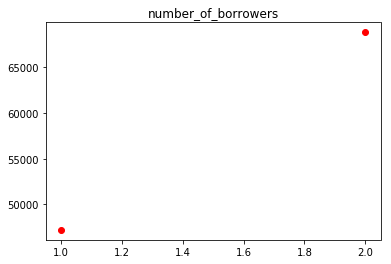

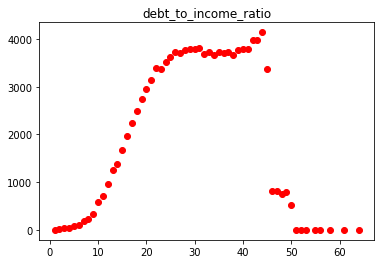

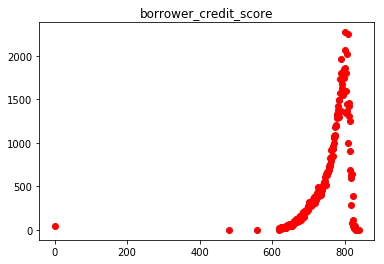

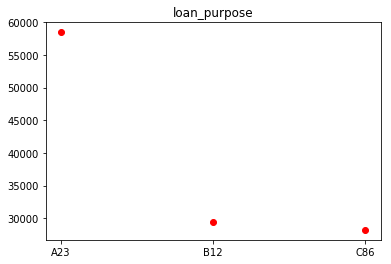

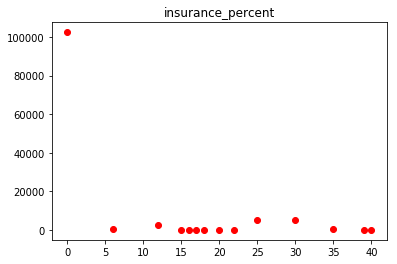

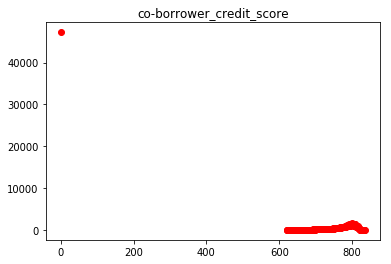

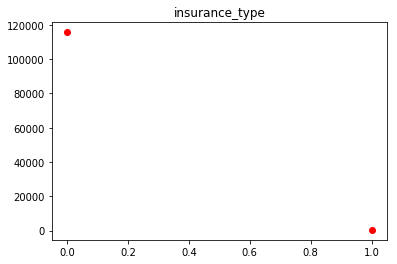

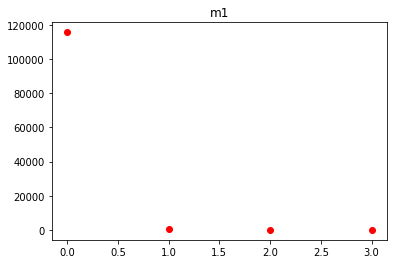

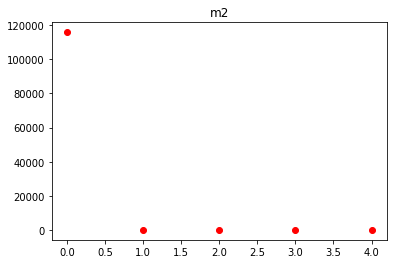

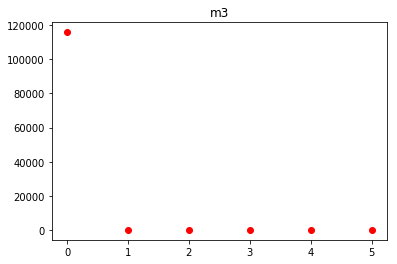

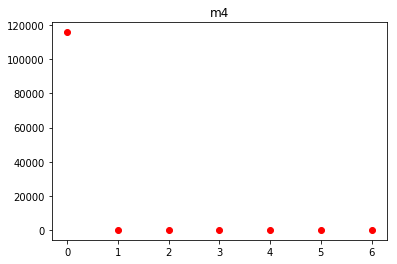

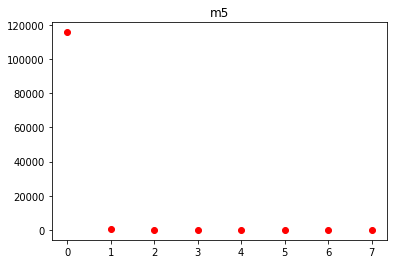

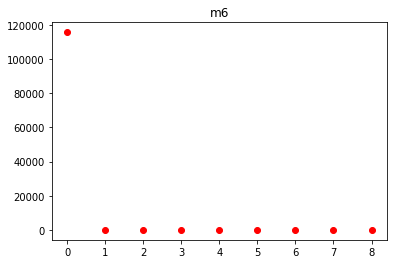

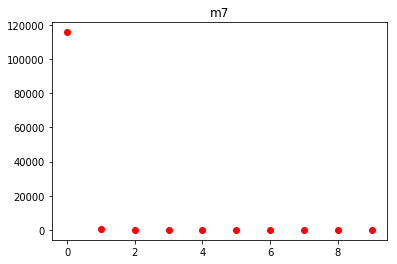

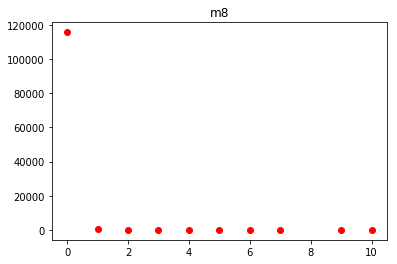

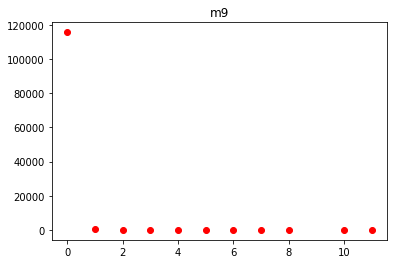

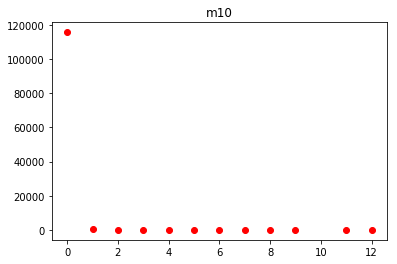

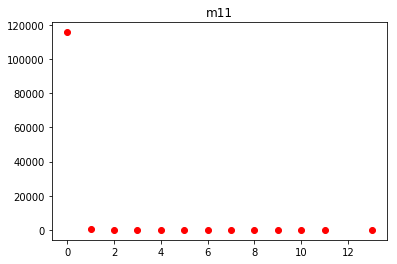

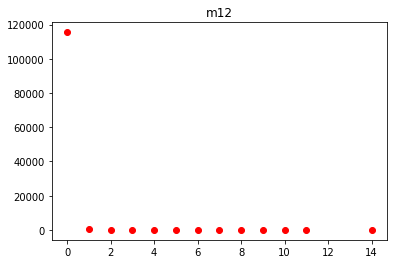

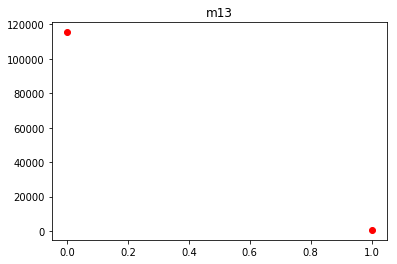

In [6]:
for i,name in enumerate(data.columns):
    #fig, ax = plt.subplots(20,2,figsize=(10,5))
    #plot_label(i+1,name,fig.axes[i])
    
    plot_one_label(name)
    

In [7]:
sample = pd.read_csv("sample_submission.csv")
sample.head()


,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [8]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(35866, 28)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
test['origination_date'] = pd.DatetimeIndex(test['origination_date']).day
first_payment_date_dict = {'Apr-12': 4, 'Mar-12':3, 'May-12':5, 'Feb-12':2} 
test['first_payment_date'] = test['first_payment_date'].map(first_payment_date_dict)
print(test.shape)
test.head()

(35866, 28)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,2,4,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,2,4,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,1,3,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,2,4,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,2,4,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = PowerTransformer()

def clean_train_data(data):
    int_cols = data.describe().columns
    all_cols = data.columns
    
    non_int_cols = [i for i in all_cols if i not in int_cols]
    print(non_int_cols)
    #data.source.unique()
    #for i in non_int_cols:
        #tr = data[i]
        #print(tr.unique())
    
    y = data['m13']
    X = data
    X['first_payment_date'] = data['first_payment_date'] - data['origination_date']
    X = X.drop(['m13','origination_date','financial_institution','loan_id'],axis=1)
    
    #X['first_payment_date'] = pd.DatetimeIndex(X['first_payment_date']).month
    #X['origination_date'] =  pd.DatetimeIndex(X['origination_date']).month
    
    X = pd.get_dummies(X,columns=['source', 'loan_purpose'])
    
    #mon_dt = pd.DataFrame(mon_diff,columns=[mon_dt])
    
    #X = 
    
    X_cols = X.columns
    df_X = scaler.fit_transform(X)
    df_scaled = pd.DataFrame(df_X,columns=X_cols)
    return df_scaled,y
    #return X,y


def clean_test_data(test):
    int_cols = test.describe().columns
    all_cols = test.columns
    
    non_int_cols = [i for i in all_cols if i not in int_cols]
    print(non_int_cols)
    #data.source.unique()
    #for i in non_int_cols:
        #tr = data[i]
        #print(tr.unique())
    
    #y = data['m13']
    #X = data.drop(['m13'],axis=1)
    #X = data.drop(['origination_date', 'first_payment_date'],axis=1)
    
    #test['origination_date'] = pd.DatetimeIndex(test['origination_date']).month
    #first_payment_date_dict = {'Apr-12': 4, 'Mar-12':3, 'May-12':5, 'Feb-12':2} 
    #test['first_payment_date'] = test['first_payment_date'].map(first_payment_date_dict)
    X = test
    X['first_payment_date'] = test['first_payment_date'] - test['origination_date']
    X = X.drop(['origination_date', 'financial_institution', 'loan_id'],axis=1)
    
    X = pd.get_dummies(X,columns=['source', 'loan_purpose'])

    X_cols = X.columns
    df_X = scaler.transform(X)
    df_scaled = pd.DataFrame(df_X,columns=X_cols)
    return df_scaled
    #return X
    

In [11]:
X,y = clean_train_data(data)
print(X.shape)
X.head()

#y.value_counts()

['source', 'financial_institution', 'loan_purpose']
(116058, 29)


,interest_rate,unpaid_principal_bal,loan_term,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,0.826517,0.050345,0.754428,-0.026766,1.594300,-1.207529,-0.898419,-1.798764,3.361200,-1.203344,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.039070,9.863609,-0.042652,-0.041791,-0.044583,-0.043642,-0.045276,-1.106044,-0.691643,2.631390,-1.00749,-0.582239,1.764550
1,2.182212,-0.560025,0.754428,-0.026766,0.264177,-1.207529,1.362454,-1.727692,-0.344138,-1.203344,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.039070,-0.041221,-0.042652,-0.041791,-0.044583,6.095719,-0.045276,-1.106044,1.445832,-0.380027,-1.00749,1.717508,-0.566717
2,-1.342595,1.375719,-1.250874,-0.026766,-1.065945,-1.207529,0.232018,0.238642,-0.344138,-1.203344,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.039070,-0.041221,-0.042652,-0.041791,-0.044583,-0.043642,-0.045276,-1.106044,-0.691643,2.631390,-1.00749,1.717508,-0.566717
3,1.911073,-0.638501,0.754428,-0.026766,-1.239439,0.828137,1.362454,-3.243901,-0.344138,0.467052,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.039070,-0.041221,-0.042652,7.756016,6.692613,6.095719,5.568680,0.904123,-0.691643,-0.380027,-1.00749,1.717508,-0.566717
4,1.911073,-0.734416,0.754428,-0.026766,0.726829,-1.207529,1.259687,-2.106744,-0.344138,-1.203344,-0.057163,-0.050458,19.418760,36.047883,48.226620,48.36153,57.069319,59.387759,61.834283,62.340670,60.590177,61.349964,61.708245,0.904123,-0.691643,-0.380027,-1.00749,-0.582239,1.764550


In [12]:
test_X = clean_test_data(test)
print(test_X.shape)
test_X.head()

['source', 'financial_institution', 'loan_purpose']
(35866, 29)


,interest_rate,unpaid_principal_bal,loan_term,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,0.013100,1.820417,0.754428,-0.026766,0.437672,-1.207529,-1.103953,0.475550,-0.344138,-1.203344,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.03907,-0.041221,-0.042652,-0.041791,-0.044583,-0.043642,-0.045276,-1.106044,1.445832,-0.380027,0.992566,-0.582239,-0.566717
1,1.368795,-0.830331,0.754428,-0.026766,0.726829,0.828137,0.232018,0.546622,-0.344138,0.849306,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.03907,-0.041221,-0.042652,-0.041791,-0.044583,-0.043642,-0.045276,0.904123,-0.691643,-0.380027,-1.007490,-0.582239,1.764550
2,1.368795,-1.187834,0.754428,-0.026766,0.437672,-1.207529,0.334785,-1.419712,-0.344138,-1.203344,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.03907,-0.041221,-0.042652,-0.041791,-0.044583,-0.043642,-0.045276,-1.106044,1.445832,-0.380027,-1.007490,-0.582239,1.764550
3,0.555378,-0.743136,-1.250874,-0.026766,-1.528596,0.828137,-0.692885,0.665076,-0.344138,0.925233,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.03907,-0.041221,-0.042652,-0.041791,-0.044583,-0.043642,-0.045276,0.904123,-0.691643,-0.380027,0.992566,-0.582239,-0.566717
4,-1.342595,-0.368194,-1.250874,-0.026766,-0.834619,0.828137,-1.926088,-0.069338,-0.344138,0.807415,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,-0.04275,-0.03907,-0.041221,-0.042652,-0.041791,-0.044583,-0.043642,-0.045276,0.904123,-0.691643,-0.380027,0.992566,-0.582239,-0.566717


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.25, random_state=99,shuffle=True)
y_train.value_counts()

0    86584
1      459
Name: m13, dtype: int64

In [14]:
xgb_clf = XGBClassifier(random_state=99)

In [15]:
param_grid = {"objective" : ["reg:squarederror"],
              "n_estimators" :   [400],
              "max_depth" : [2],
              "subsample" : [0.8],
              "learning_rate": [0.03]
             }

scorer = make_scorer(f1_score)

# run grid search
cv_obj = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5, scoring=scorer)
cv = cv_obj.fit(X_train,y_train)
best_cv = cv.best_estimator_
print(best_cv)
train_pred = best_cv.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='reg:squarederror', random_state=99,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)


In [16]:
#train_pred = model.predict(X_test)
score = (train_pred == y_test).mean()
print(score)
fscore = f1_score(train_pred,y_test,average='binary')
print(fscore)


0.995554023780803
0.4777327935222672


In [17]:
# Creating predict file
test_pred = best_cv.predict(test_X)
test_cols = test.columns
print(test_cols)

test_data1 = test.drop([ 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term','origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'],axis=1)
test_pred_df = pd.DataFrame(test_pred, columns = ['m13'])
final_pred = pd.concat([test_data1,test_pred_df],axis=1)
final_pred.to_csv("predicts/predict111.csv", sep =',', encoding='utf-8',index=False)

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'],
      dtype='object')


In [18]:
print(final_pred.m13.value_counts())
final_pred.head()

0    35794
1       72
Name: m13, dtype: int64


,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
